# Simple baseline binary classifier using FFHQ dataset to balance the data
This kernal shows a simple training pipeline. I'm sure a lot can be improved upon.  
View this kernal for inference and submission: https://www.kaggle.com/greatgamedota/xception-binary-classifier-inference

Thanks to:  
[@unkownhihi](https://www.kaggle.com/unkownhihi) for dataset and corresponding kernal: https://www.kaggle.com/unkownhihi/starter-kernel-with-cnn-model-ll-lb-0-69235  
[@humananalog](https://www.kaggle.com/humananalog) for inference kernal: https://www.kaggle.com/humananalog/inference-demo

Link to my FFHQ dataset: https://www.kaggle.com/greatgamedota/ffhq-face-data-set

Update 1: Fixed data leak when balancing data and added more augmentations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm,trange
from sklearn.model_selection import train_test_split
import sklearn.metrics

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

# Setup Data

In [2]:
df_train0 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_0/metadata.json')
df_train1 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_1/metadata.json')
df_train2 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_2/metadata.json')
df_train3 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_3/metadata.json')
df_train4 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_4/metadata.json')
df_train5 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_5/metadata.json')
df_train6 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_6/metadata.json')
df_train7 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_7/metadata.json')
df_train8 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_8/metadata.json')
df_train9 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_9/metadata.json')
df_train10 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_10/metadata.json')
df_train11 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_11/metadata.json')
df_train12 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_12/metadata.json')
df_train13 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_13/metadata.json')
df_train14 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_14/metadata.json')
df_train15 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_15/metadata.json')
df_train16 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_16/metadata.json')
df_train17 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_17/metadata.json')
df_train18 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_18/metadata.json')
df_train19 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_19/metadata.json')
df_train20 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_20/metadata.json')
df_train21 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_21/metadata.json')
df_train22 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_22/metadata.json')
df_train23 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_23/metadata.json')
df_train24 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_24/metadata.json')
df_train25 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_25/metadata.json')
df_train26 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_26/metadata.json')
df_train27 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_27/metadata.json')
df_train28 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_28/metadata.json')
df_train29 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_29/metadata.json')
df_train30 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_30/metadata.json')
df_train31 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_31/metadata.json')
df_train32 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_32/metadata.json')
df_train33 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_33/metadata.json')
df_train34 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_34/metadata.json')
df_train35 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_35/metadata.json')
df_train36 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_36/metadata.json')
df_train37 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_37/metadata.json')
df_train38 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_38/metadata.json')
df_train39 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_39/metadata.json')
df_train40 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_40/metadata.json')
df_train41 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_41/metadata.json')
df_train42 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_42/metadata.json')
df_train43 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_43/metadata.json')
df_train44 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_44/metadata.json')
df_train45 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_45/metadata.json')
df_train46 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_46/metadata.json')





df_val1 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_47/metadata.json')
df_val2 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_48/metadata.json')
df_val3 = pd.read_json('/home/aelbakry1999/dfdc/dfdc_train_part_49/metadata.json')






df_trains = [df_train0 ,df_train1, df_train2, df_train3, df_train4,
             df_train5, df_train6, df_train7, df_train8, df_train9,df_train10,
            df_train11, df_train12, df_train13, df_train14, df_train15,df_train16, 
            df_train17, df_train18, df_train19, df_train20, df_train21, df_train22, 
            df_train23, df_train24, df_train25, df_train26, df_train27, df_train28, 
            df_train29, df_train30, df_train31, df_train32, df_train33, df_train34,
            df_train34, df_train35, df_train36, df_train37, df_train38, df_train39,
            df_train40, df_train41, df_train42, df_train43, df_train44, df_train45,
            df_train46]

df_vals=[df_val1, df_val2, df_val3]
nums = list(range(len(df_trains)+1))
LABELS = ['REAL','FAKE']
val_nums=[47, 48, 49]
frame_index = 10



In [37]:

def get_path(num,x):
    num=str(num)
    if len(num)==2:
        path='/home/aelbakry1999/images/margin_0/dfdc_train_part_'+ num +'/'+ x.replace('.mp4', '') + '/frame' + str(frame_index) +'.jpeg'
    else:
        path='/home/aelbakry1999/images/margin_0/dfdc_train_part_'+ num +'/'+ x.replace('.mp4', '') + '/frame' + str(frame_index) +'.jpeg'
    if not os.path.exists(path):
       raise Exception
    return path
paths=[]
y=[]
for df_train,num in tqdm(zip(df_trains,nums),total=len(df_trains)):
    images = list(df_train.columns.values)
    for x in images:
        try:
            paths.append(get_path(num,x))
            y.append(LABELS.index(df_train[x]['label']))
        except Exception as err:
            #print(err)
            pass

val_paths=[]
val_y=[]
for df_val,num in tqdm(zip(df_vals,val_nums),total=len(df_vals)):
    images = list(df_val.columns.values)
    for x in images:
        try:
            val_paths.append(get_path(num,x))
            val_y.append(LABELS.index(df_val[x]['label']))
        except Exception as err:
            #print(err)
            pass

100%|██████████| 3/3 [00:00<00:00, 17.63it/s]


In [38]:
print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(val_y.count(1))+' fake val samples')
print('There are '+str(val_y.count(0))+' real val samples')

There are 65174 fake train samples
There are 12109 real train samples
There are 6216 fake val samples
There are 1290 real val samples


In [39]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)

def shuffle(X,y):
    new_train=[]
    for m,n in zip(X,y):
        new_train.append([m,n])
    random.shuffle(new_train)
    X,y=[],[]
    for x in new_train:
        X.append(x[0])
        y.append(x[1])
    return X,y

import random
def get_random_sampling(paths, y, val_paths, val_y):
  real=[]
  fake=[]
  for m,n in zip(paths,y):
      if n==0:
          real.append(m)
      else:
          fake.append(m)
  # fake=random.sample(fake,len(real))
  paths,y=[],[]
  for x in real:
      paths.append(x)
      y.append(0)
  for x in fake:
      paths.append(x)
      y.append(1)

  real=[]
  fake=[]
  for m,n in zip(val_paths,val_y):
      if n==0:
          real.append(m)
      else:
          fake.append(m)
  # fake=random.sample(fake,len(real))
  val_paths,val_y=[],[]
  for x in real:
      val_paths.append(x)
      val_y.append(0)
  for x in fake:
      val_paths.append(x)
      val_y.append(1)

  X=[]
  for img in tqdm(paths):
      X.append(read_img(img))
  val_X=[]
  for img in tqdm(val_paths):
      val_X.append(read_img(img))

  # Balance with ffhq dataset
  ffhq = os.listdir('/home/aelbakry1999/FFHQ/thumbnails128x128')
  X_ = []
  for file in tqdm(ffhq):
    im = read_img(f'/home/aelbakry1999/FFHQ/thumbnails128x128/{file}')
    im = cv2.resize(im, (160,160))
    X_.append(im)
  random.shuffle(X_)

  for i in range(65174 - 12109):
    X.append(X_[i])
    y.append(0)
  del X_[0:65174 - 12109]
  for i in range(6216 - 1290):
    val_X.append(X_[i])
    val_y.append(0)

  X, y = shuffle(X,y)
  val_X, val_y = shuffle(val_X,val_y)

  return X, val_X, y, val_y

# Dataset

In [24]:
from torch.utils.data import Dataset, DataLoader
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

class ImageDataset(Dataset):
    def __init__(self, X, y, training=True, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        self.training = training

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img = self.X[idx]

        if self.transform is not None:
          res = self.transform(image=img)
          img = res['image']
        
        img = np.rollaxis(img, 2, 0)
        # img = np.array(img).astype(np.float32) / 255.

        labels = self.y[idx]
        labels = np.array(labels).astype(np.float32)
        return [img, labels]

# Model

In [25]:
!pip install pytorchcv --quiet
from pytorchcv.model_provider import get_model
model = get_model("xception", pretrained=True)
# model = get_model("resnet18", pretrained=True)
model = nn.Sequential(*list(model.children())[:-1]) # Remove original output layer

In [26]:
model[0].final_block.pool = nn.Sequential(nn.AdaptiveAvgPool2d(1))
# model[0].final_pool = nn.Sequential(nn.AdaptiveAvgPool2d(1))

In [27]:
class Head(torch.nn.Module):
  def __init__(self, in_f, out_f):
    super(Head, self).__init__()
    
    self.f = nn.Flatten()
    self.l = nn.Linear(in_f, 512)
    self.d = nn.Dropout(0.75)
    self.o = nn.Linear(512, out_f)
    self.b1 = nn.BatchNorm1d(in_f)
    self.b2 = nn.BatchNorm1d(512)
    self.r = nn.ReLU()

  def forward(self, x):
    x = self.f(x)
    x = self.b1(x)
    x = self.d(x)

    x = self.l(x)
    x = self.r(x)
    x = self.b2(x)
    x = self.d(x)

    out = self.o(x)
    return out

In [28]:
class FCN(torch.nn.Module):
  def __init__(self, base, in_f):
    super(FCN, self).__init__()
    self.base = base
    self.h1 = Head(in_f, 1)
  
  def forward(self, x):
    x = self.base(x)
    return self.h1(x)

model = FCN(model, 2048)

In [29]:
# !pip install torchtoolbox --quiet
# from torchtoolbox.tools import summary

# model.cuda()
# summary(model, torch.rand((1, 3, 150, 150)).cuda())

# Train Functions

In [30]:
def criterion1(pred1, targets):
  l1 = F.binary_cross_entropy(F.sigmoid(pred1), targets)
  return l1

def train_model(epoch, optimizer, scheduler=None, history=None):
    model.train()
    total_loss = 0
    
    t = tqdm(train_loader)
    for i, (img_batch, y_batch) in enumerate(t):
        img_batch = img_batch.cuda().float() #get batch images
        y_batch = y_batch.cuda().float() #get batch labels

        optimizer.zero_grad()

        out = model(img_batch) #make predictions pass batch
        loss = criterion1(out, y_batch) #calculate loss

        total_loss += loss
        t.set_description(f'Epoch {epoch+1}/{n_epochs}, LR: %6f, Loss: %.4f'%(optimizer.state_dict()['param_groups'][0]['lr'],total_loss/(i+1)))

        if history is not None:
          history.loc[epoch + i / len(X), 'train_loss'] = loss.data.cpu().numpy()
          history.loc[epoch + i / len(X), 'lr'] = optimizer.state_dict()['param_groups'][0]['lr']

        loss.backward() # calculate gradients
        optimizer.step() # Update weights
        if scheduler is not None:
          scheduler.step()

def evaluate_model(epoch, scheduler=None, history=None):
    model.eval()
    loss = 0
    pred = []
    real = []
    with torch.no_grad():
        for img_batch, y_batch in val_loader:
            img_batch = img_batch.cuda().float()
            y_batch = y_batch.cuda().float()

            o1 = model(img_batch)
            l1 = criterion1(o1, y_batch)
            loss += l1
            
            for j in o1:
              pred.append(F.sigmoid(j))
            for i in y_batch:
              real.append(i.data.cpu())
    
    pred = [p.data.cpu().numpy() for p in pred]
    pred2 = pred
    pred = [np.round(p) for p in pred]
    pred = np.array(pred)
    acc = sklearn.metrics.recall_score(real, pred, average='macro')

    real = [r.item() for r in real]
    pred2 = np.array(pred2).clip(0.1, 0.9)
    kaggle = sklearn.metrics.log_loss(real, pred2)

    loss /= len(val_loader)
    
    if history is not None:
        history.loc[epoch, 'dev_loss'] = loss.cpu().numpy()
    
    if scheduler is not None:
      scheduler.step(loss)

    print(f'Dev loss: %.4f, Acc: %.6f, Kaggle: %.6f'%(loss,acc,kaggle))
    
    return loss

# Dataloaders

In [40]:
X, val_X, y, val_y = get_random_sampling(paths, y, val_paths, val_y)

print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(val_y.count(1))+' fake val samples')
print('There are '+str(val_y.count(0))+' real val samples')

100%|██████████| 70000/70000 [00:51<00:00, 1362.24it/s]


There are 65174 fake train samples
There are 65174 real train samples
There are 6216 fake val samples
There are 6216 real val samples


In [32]:
import albumentations
from albumentations.augmentations.transforms import ShiftScaleRotate, HorizontalFlip, Normalize, RandomBrightnessContrast, MotionBlur, Blur, GaussNoise, JpegCompression
train_transform = albumentations.Compose([
                                          ShiftScaleRotate(p=0.3, scale_limit=0.25, border_mode=1, rotate_limit=25),
                                          HorizontalFlip(p=0.2),
                                          RandomBrightnessContrast(p=0.3, brightness_limit=0.25, contrast_limit=0.5),
                                          MotionBlur(p=.2),
                                          GaussNoise(p=.2),
                                          JpegCompression(p=.2, quality_lower=50),
                                          Normalize()
])
val_transform = albumentations.Compose([
                                          Normalize()
])

train_dataset = ImageDataset(X, y, transform=train_transform)
val_dataset = ImageDataset(val_X, val_y, transform=val_transform)

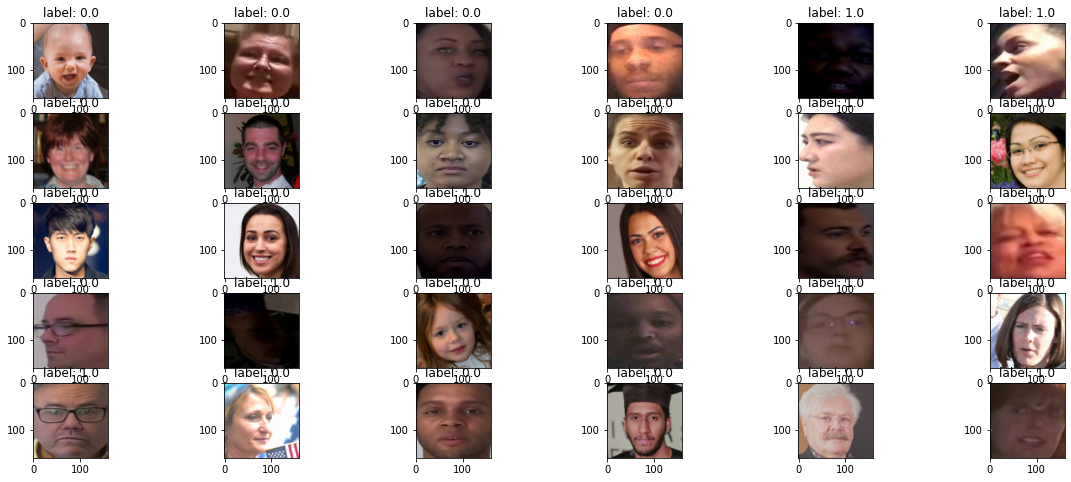

In [33]:
nrow, ncol = 5, 6
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    image, label = train_dataset[i]
    image = np.rollaxis(image, 0, 3)
    image = image*std + mean
    image = np.clip(image, 0., 1.)
    ax.imshow(image)
    ax.set_title(f'label: {label}')

# Train

In [ ]:
import gc
from torch.utils.tensorboard import SummaryWriter
import torchvision


history = pd.DataFrame()
history2 = pd.DataFrame()

torch.cuda.empty_cache()
gc.collect()

best = 1e10
n_epochs = 2
batch_size = 128

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

model = model.cuda()

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, mode='min', factor=0.7, verbose=True, min_lr=1e-5)


images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(model, images.cuda())

for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    gc.collect()

    train_model(epoch, optimizer, scheduler=None, history=history)
    
    loss = evaluate_model(epoch, scheduler=scheduler, history=history2)
    
    tb.add_scalar('Loss', loss, epoch)
    
    
    if loss < best:
      best = loss
      print(f'Saving best model...')
      torch.save(model.state_dict(), f'model.pth')
    
tb.close()
    

Epoch 1/2, LR: 0.001000, Loss: 0.4232: 100%|██████████| 1016/1016 [16:34<00:00,  1.02it/s]


Dev loss: 0.4233, Acc: 0.500000, Kaggle: 0.463554
Saving best model...


Epoch 2/2, LR: 0.001000, Loss: 0.4197:  67%|██████▋   | 685/1016 [11:13<05:25,  1.02it/s]

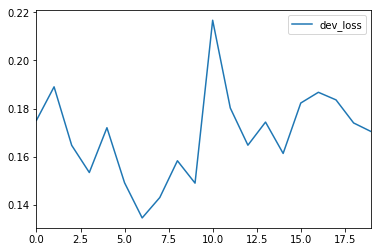

In [16]:
history2.plot()

## View this kernal for inference and submission: https://www.kaggle.com/greatgamedota/xception-binary-classifier-inference